<a href="https://colab.research.google.com/github/alwanfakhri/EDA_and_Predict_Spend_vs_Sales/blob/main/EDA_and_Predict_Spend_vs_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
sheet_url = "https://docs.google.com/spreadsheets/d/17-To8cge-4w130xKDDuC52ZJ3bTQQczDgn9QwtiXPMg/edit?usp=sharing"
csv_export_url = sheet_url.replace("/edit?usp=sharing","/export?format=csv")
df = pd.read_csv(csv_export_url)

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 4)

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

,0
TV,0
radio,0
newspaper,0
sales,0


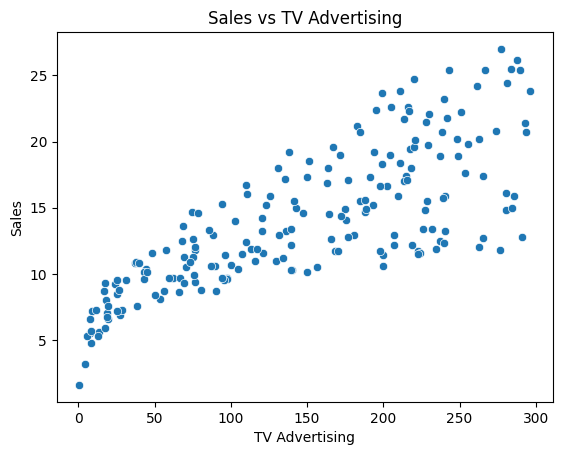

In [8]:
sns.scatterplot(x='TV', y='sales', data=df)
plt.title('Sales vs TV Advertising')
plt.xlabel('TV Advertising')
plt.ylabel('Sales')
plt.show()

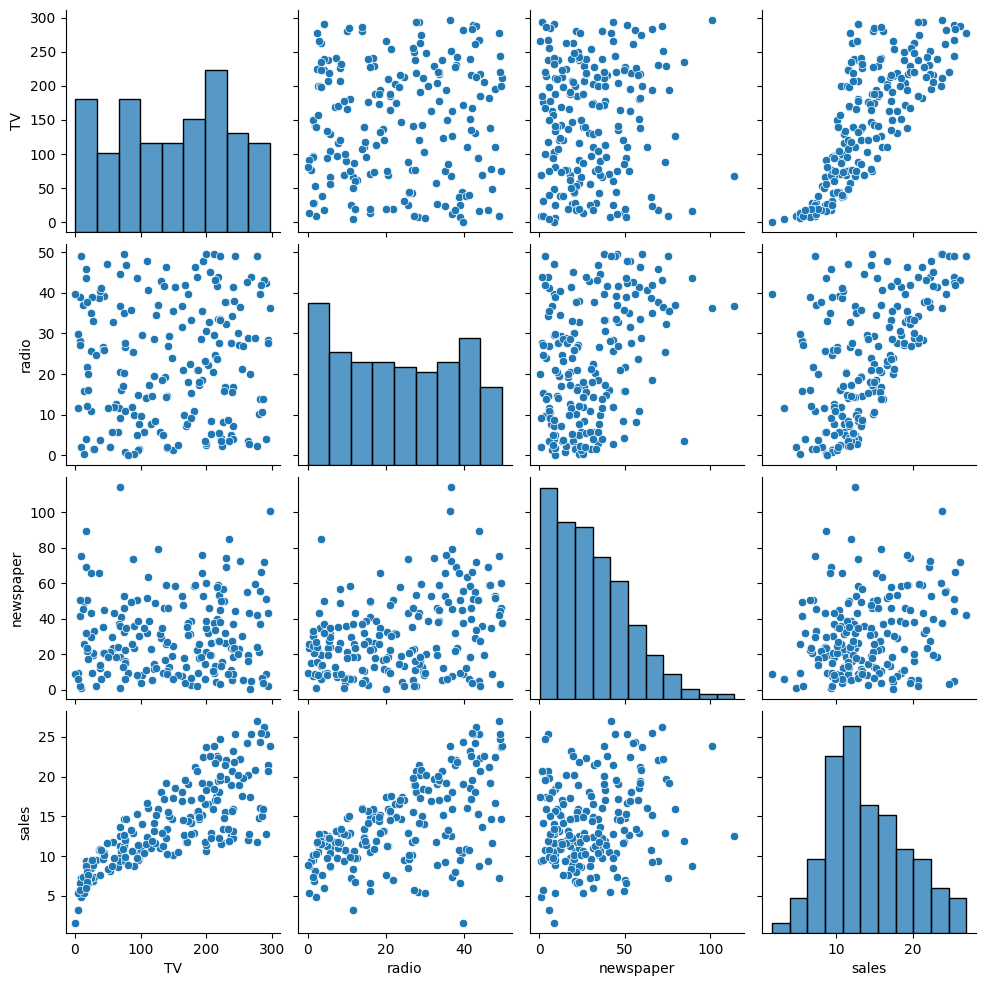

In [9]:
sns.pairplot(df)
plt.show()

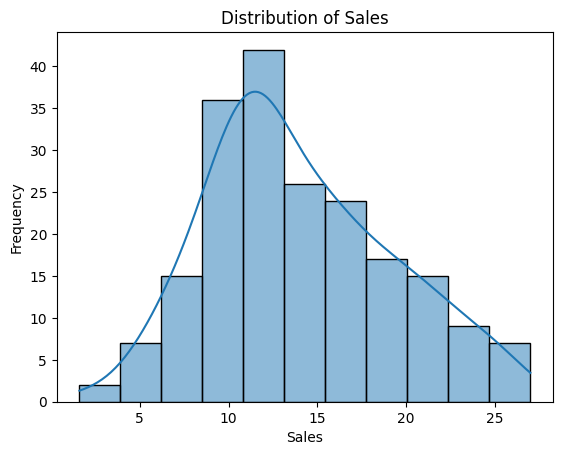

In [10]:
sns.histplot(df['sales'], kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

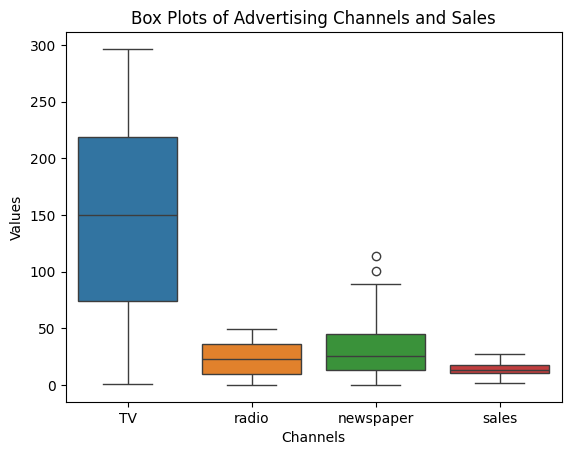

In [12]:
sns.boxplot(data=df[['TV', 'radio', 'newspaper', 'sales']])
plt.title('Box Plots of Advertising Channels and Sales')
plt.xlabel('Channels')
plt.ylabel('Values')
plt.show()

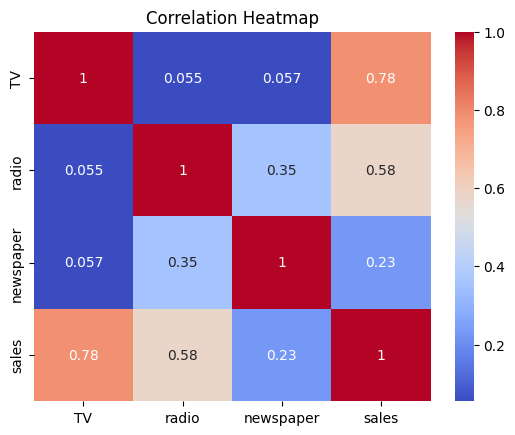

In [13]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

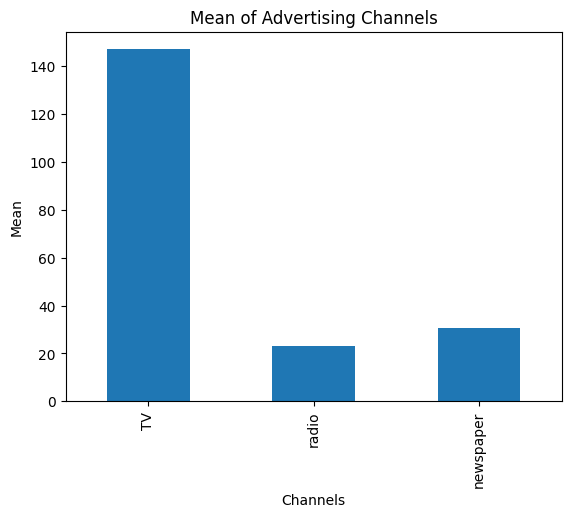

In [15]:
df.mean()[:-1].plot(kind='bar')
plt.title('Mean of Advertising Channels')
plt.xlabel('Channels')
plt.ylabel('Mean')
plt.show()

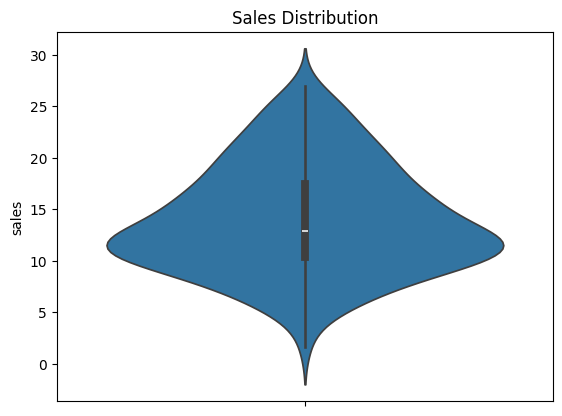

In [17]:
sns.violinplot(y='sales', data=df)
plt.title('Sales Distribution')
plt.show()

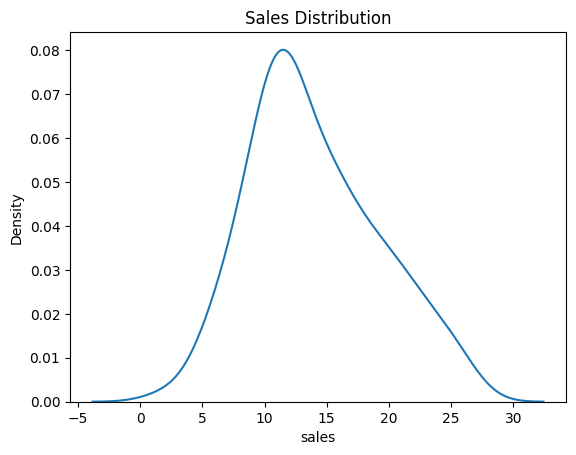

In [19]:
sns.kdeplot(df['sales'])
plt.title('Sales Distribution')
plt.show()

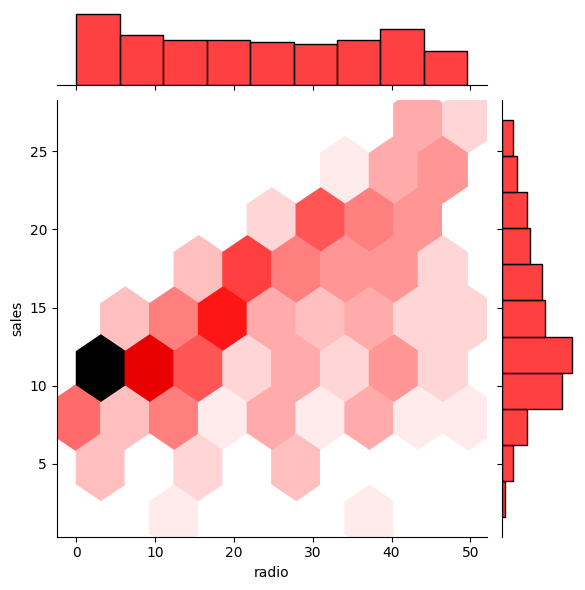

In [21]:
sns.jointplot(x='radio', y='sales', data=df, kind='hex', color='red')
plt.show()

In [22]:
fig = px.scatter_3d(df, x='TV', y='radio', z='newspaper', color='sales', size='sales')
fig.show()

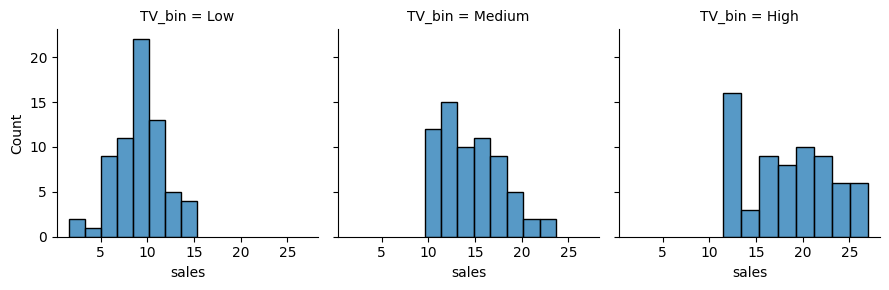

In [23]:
df['TV_bin'] = pd.qcut(df['TV'], q=3, labels=['Low', 'Medium', 'High'])
g = sns.FacetGrid(df, col='TV_bin')
g.map(sns.histplot, 'sales')
plt.show()

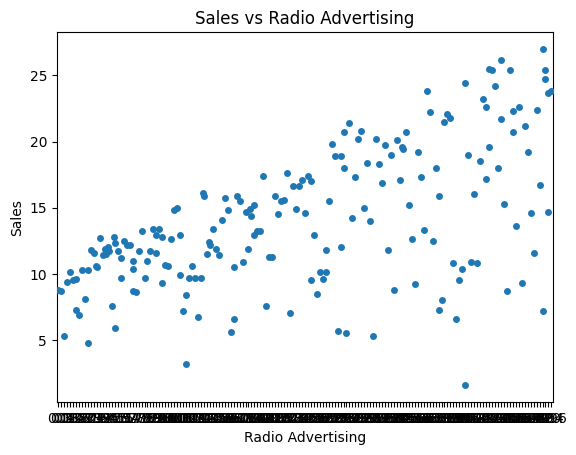

In [30]:
sns.swarmplot(x='radio', y='sales', data=df)
plt.title('Sales vs Radio Advertising')
plt.xlabel('Radio Advertising')
plt.ylabel('Sales')
plt.show()

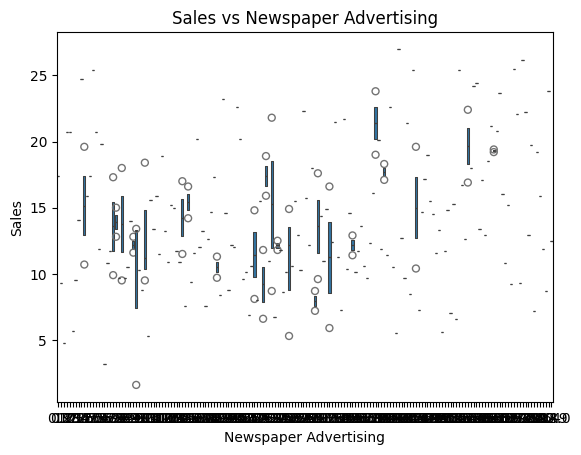

In [31]:
sns.boxenplot(x='newspaper', y='sales', data=df)
plt.title('Sales vs Newspaper Advertising')
plt.xlabel('Newspaper Advertising')
plt.ylabel('Sales')
plt.show()

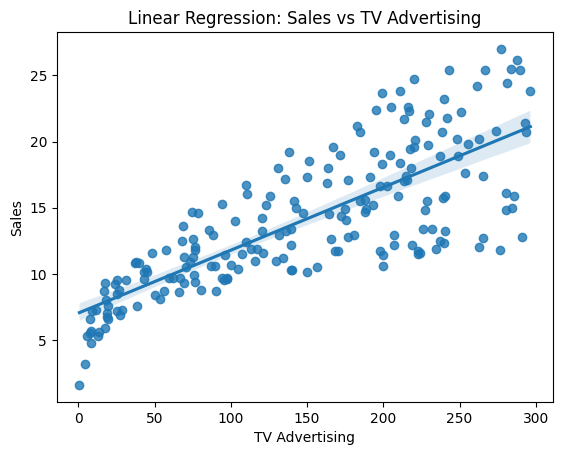

In [32]:
sns.regplot(x='TV', y='sales', data=df)
plt.title('Linear Regression: Sales vs TV Advertising')
plt.xlabel('TV Advertising')
plt.ylabel('Sales')
plt.show()

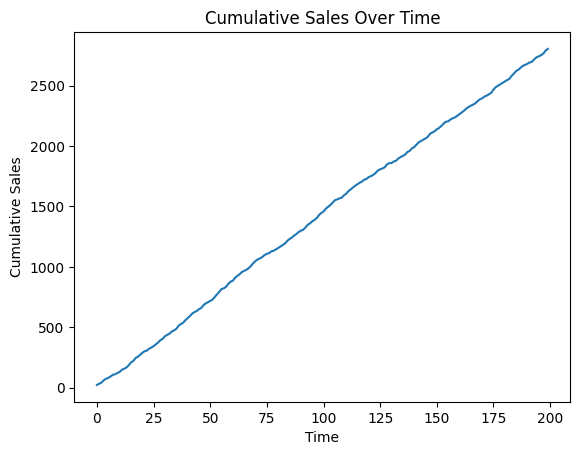

In [33]:
df['cumulative_sales'] = df['sales'].cumsum()
sns.lineplot(x=df.index, y='cumulative_sales', data=df)
plt.title('Cumulative Sales Over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Sales')
plt.show()

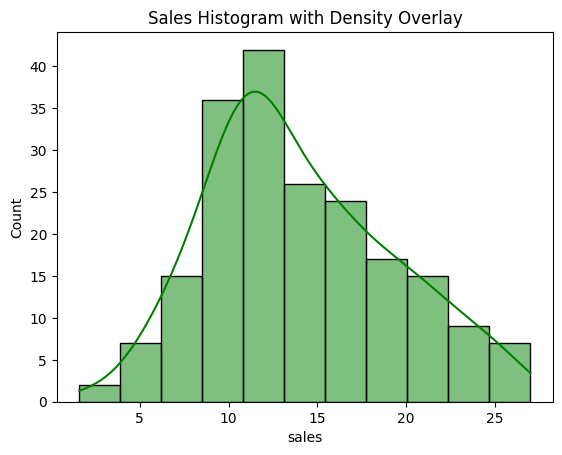

In [34]:
sns.histplot(df['sales'], kde=True, color='green')
plt.title('Sales Histogram with Density Overlay')
plt.show()

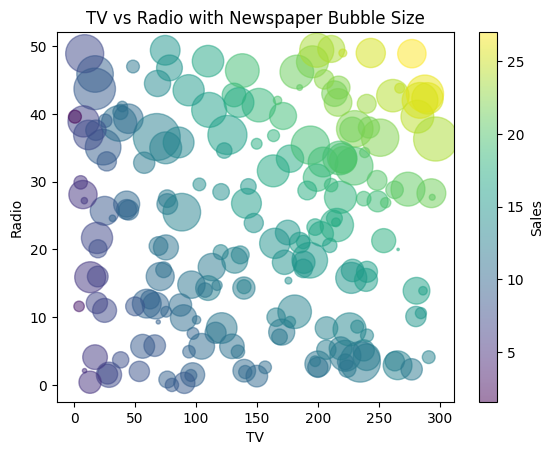

In [35]:
plt.scatter(df['TV'], df['radio'], df['newspaper']*10, alpha=0.5, c=df['sales'], cmap='viridis')
plt.colorbar(label='Sales')
plt.xlabel('TV')
plt.ylabel('Radio')
plt.title('TV vs Radio with Newspaper Bubble Size')
plt.show()



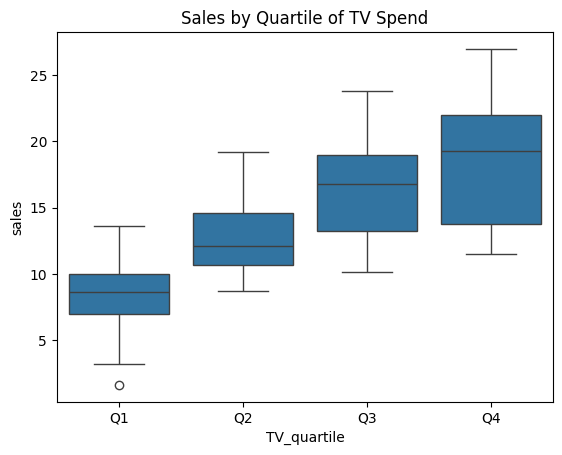

In [36]:
df['TV_quartile'] = pd.qcut(df['TV'], q=4, labels=['Q1','Q2','Q3','Q4'])
sns.boxplot(x='TV_quartile', y='sales', data=df)
plt.title('Sales by Quartile of TV Spend')
plt.show()

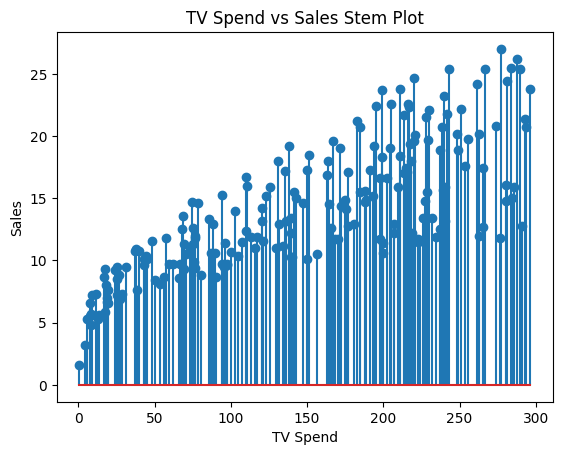

In [37]:
df_sorted = df.sort_values(by='TV')
plt.stem(df_sorted['TV'], df_sorted['sales'])
plt.xlabel('TV Spend')
plt.ylabel('Sales')
plt.title('TV Spend vs Sales Stem Plot')
plt.show()

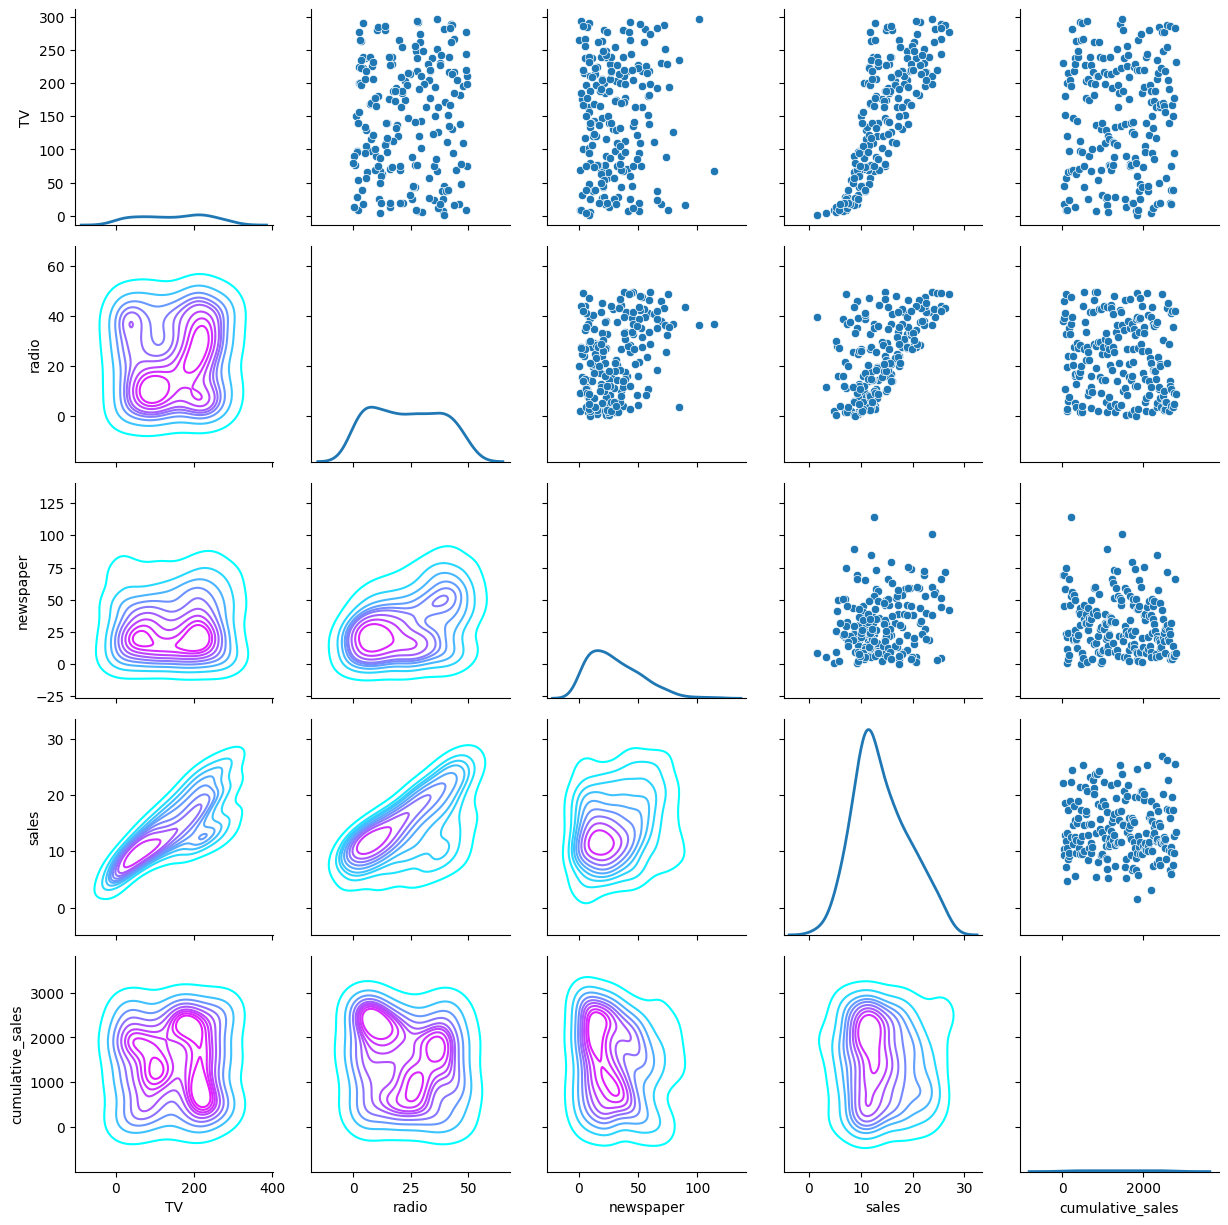

In [39]:
g = sns.PairGrid(df)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, cmap='cool')
g.map_diag(sns.kdeplot, lw=2)
plt.show()

In [40]:
# Define threshold for classification (e.g., median sales)
df['sales_category'] = (df['sales'] > df['sales'].median()).astype(int)

# Features and Target
x = df[['TV', 'radio', 'newspaper']]
y = df['sales_category']

In [41]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Scale the features for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

In [46]:
# Print accuracy score and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        41
           1       0.95      0.95      0.95        19

    accuracy                           0.97        60
   macro avg       0.96      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60



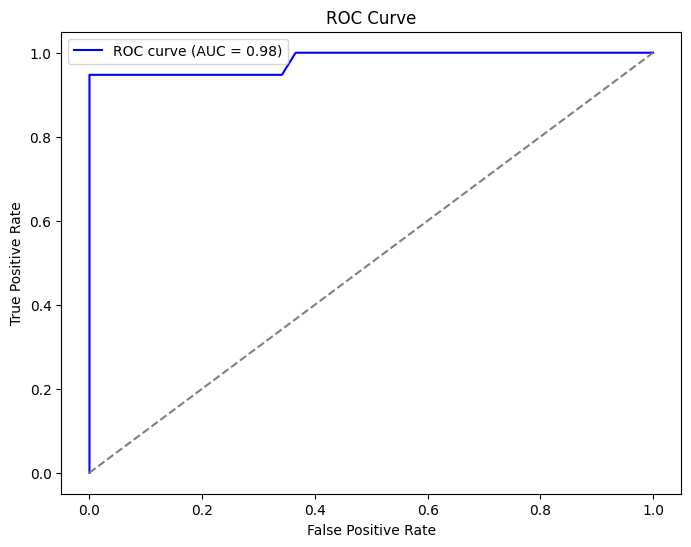

In [47]:
from sklearn.metrics import roc_auc_score, roc_curve

# Compute ROC and AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

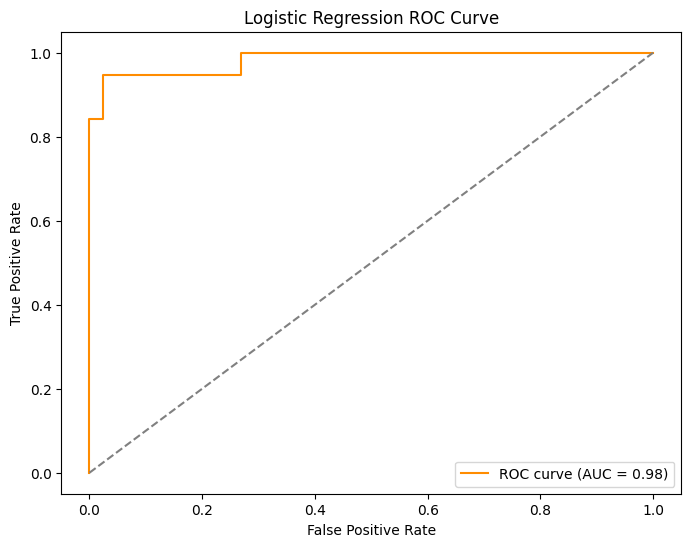

In [48]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model for binary classification
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Predict probabilities
y_pred_proba_logreg = logreg.predict_proba(X_test)[:, 1]

# Compute ROC and AUC
roc_auc_logreg = roc_auc_score(y_test, y_pred_proba_logreg)
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_proba_logreg)

# Plot ROC Curve for Logistic Regression
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, color='darkorange', label=f"ROC curve (AUC = {roc_auc_logreg:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.legend()
plt.show()